In [1]:
import pandas as pd
from dfply import *
import datetime as dt
from glob import glob
import re
from toolz import first
from more_dfply import recode
from functoolz import pipeable

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from project_raw_pd_parcel_types import common_parcel_types

lake_data = pd.read_csv("./data/union_of_parcel_data.csv")

lake_stats = pd.read_csv("./data/lakes_stats.csv")

lake_stats.columns = ['Unnamed: 0', 'lake_code', 'Year', 'lake_name', 'mean_secchi',
       'med_secchi', 'sd_secchi', 'mean_phos', 'med_phos', 'sd_phos']

#lake_stats.head()

#lake_data.columns

lake_all = lake_data >> left_join(lake_stats, by=['Year', 'lake_code', 'lake_name'])

#lake_all.shape

#lake_all.head()

lake_all.to_csv("./data/parcel_with_lake_data.csv")

In [13]:
lake_all = pd.read_csv("./data/parcel_with_lake_data.csv")

/home/ox6036qb/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4,5,6,8,9,13,14,17,18,19,20,26,29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
lake_all.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'ACRES_DEED', 'ACRES_POLY', 'AGPRE_ENRD',
       'AG_PRESERV', 'BASEMENT', 'CITY', 'COOLING', 'DWELL_TYPE', 'EMV_BLDG',
       'EMV_LAND', 'FIN_SQ_FT', 'GARAGE', 'GARAGESQFT', 'GREEN_ACRE',
       'HOMESTEAD', 'LANDMARK', 'OWN_ADD_L1', 'OWN_ADD_L2', 'OWN_ADD_L3',
       'PARC_CODE', 'PIN', 'SALE_VALUE', 'SPEC_ASSES', 'TAX_CAPAC',
       'TAX_EXEMPT', 'TOTAL_TAX', 'USE1_DESC', 'USE2_DESC', 'USE3_DESC',
       'USE4_DESC', 'WSHD_DIST', 'XUSE1_DESC', 'XUSE2_DESC', 'XUSE3_DESC',
       'XUSE4_DESC', 'YEAR_BUILT', 'Year', 'centroid_lat', 'centroid_long',
       'lat_long', 'lake_code', 'distance_to_lake', 'lake_name',
       'Unnamed: 0_y', 'mean_secchi', 'med_secchi', 'sd_secchi', 'mean_phos',
       'med_phos', 'sd_phos'],
      dtype='object')

In [31]:
secchi_by_lake = (lake_all
                  >> group_by(X.lake_name)
                  >> summarize(overall_mean_secchi = X.mean_secchi.mean())
                 ) 

In [49]:
low_secchi = [name for name in secchi_by_lake.sort_values('overall_mean_secchi')[0:5].lake_name]

high_secchi = [name for name in secchi_by_lake.sort_values('overall_mean_secchi')[-5:].lake_name]

In [51]:
lake_names = set(lake_all.lake_name)

Text(0,0.5,'Mean Secchi Depth')

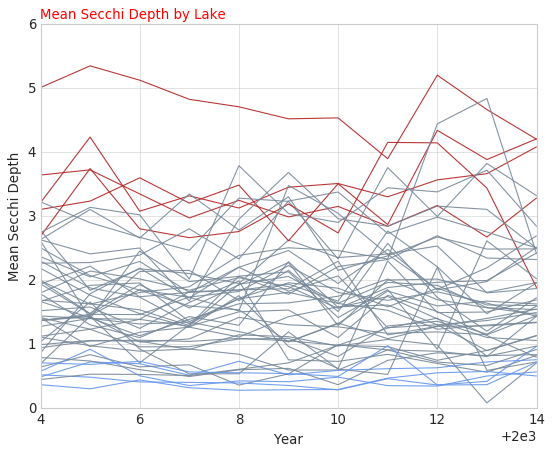

In [93]:
plt.style.use('seaborn-whitegrid')

palette = plt.get_cmap('Set1')

for name in lake_names:
    df = (lake_all >> filter_by(X.lake_name == name))
    if name in high_secchi:
        plt.plot(df.Year, df.mean_secchi, marker='', color='firebrick', linewidth=1, alpha=0.9, label="High Mean Secchi Depth")
    elif name in low_secchi:
        plt.plot(df.Year, df.mean_secchi, marker='', color='cornflowerblue', linewidth=1, alpha=0.9, label="Low Mean Secchi Depth")
    else:
        plt.plot(df.Year, df.mean_secchi, marker='', color='lightslategrey', linewidth=1, alpha=0.9, label="Mean Secchi Depth")
               

    
plt.title("Mean Secchi Depth by Lake", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Mean Secchi Depth")


In [88]:
plt.style.available

['Solarize_Light2',
 '_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'tableau-colorblind10']

In [56]:
phos_by_lake = (lake_all
                  >> group_by(X.lake_name)
                  >> summarize(overall_mean_phos = X.mean_phos.mean())
                 ) 

In [58]:
low_phos = [name for name in phos_by_lake.sort_values('overall_mean_phos')[0:5].lake_name]

high_phos = [name for name in phos_by_lake.sort_values('overall_mean_phos')[-5:].lake_name]

Text(0,0.5,'Mean Phosphorus')

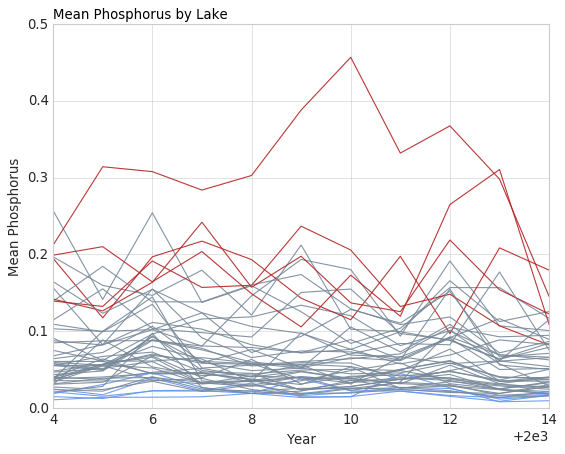

In [94]:
plt.style.use('seaborn-whitegrid')

#palette = plt.get_cmap('Set1')

for name in lake_names:
    df = (lake_all >> filter_by(X.lake_name == name))
    if name in high_phos:
        plt.plot(df.Year, df.mean_phos, marker='', color='firebrick', linewidth=1, alpha=0.9, label="High Mean phosphorus")
    elif name in low_phos:
        plt.plot(df.Year, df.mean_phos, marker='', color='cornflowerblue', linewidth=1, alpha=0.9, label="Low Mean phosphorus")
    else:
        plt.plot(df.Year, df.mean_phos, marker='', color='lightslategrey', linewidth=1, alpha=0.9, label="Mean phosphorus")
               

    
plt.title("Mean Phosphorus by Lake", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Year")
plt.ylabel("Mean Phosphorus")
